In [1]:
import numpy as np
from pyunicorn.timeseries.surrogates import Surrogates

In [2]:
ts = Surrogates.SmallTestData().original_data
surrogates = Surrogates.SmallTestData().white_noise_surrogates(ts)
print(surrogates)

[[-1.03383228e-01  6.14648334e-01  8.96802247e-01 ...  2.51377070e-01
   1.20243359e+00 -3.63271264e-01]
 [ 7.73659070e-01  1.00000000e+00  5.00000000e-01 ...  1.07586725e+00
   7.73659070e-01 -1.97266950e+00]
 [ 1.36602540e+00 -1.42039522e-01 -3.12440154e-01 ...  1.53884177e+00
   1.66365250e+00 -3.63271264e-01]
 [-1.12145715e+00  1.05471187e-15  2.00000000e+00 ... -1.11803399e+00
   1.58267606e+00 -8.96802247e-01]
 [ 1.65669028e+00 -3.66025404e-01 -2.51377070e-01 ...  7.86610205e-01
   8.88178420e-16  8.96802247e-01]
 [ 1.63742946e-02  1.42039522e-01  6.38616362e-01 ...  7.73659070e-01
  -2.78768258e-01  1.07586725e+00]]


       #  The algorithm proceeds in several steps:
        #  1. Embed the original_data time series, using time delay embedding
        #     for simplicity. Use the same dimension and time delay delay for
        #     all time series for simplicity. Determine delay using time
        #     delayed mutual information and dimension using false nearest neighbors
        #     methods.
        #  2. Use the algorithm proposed in [*] to find twins
        #  3. Reconstruct one-dimensional twin surrogate time series
Some good articles on Mutual Information | Time Delay 
http://www.physics.emory.edu/faculty/weeks//research/tseries3.html
Use R package tseriesChaos to find out the time delay using Mutual Information 
from lagged time series. 

For pr_Amon_GISS-E2-R_past1000_r1i1p128_0850_1850_goswami_india_tseries_mi.csv the time delay is found as T=2 using the following plot 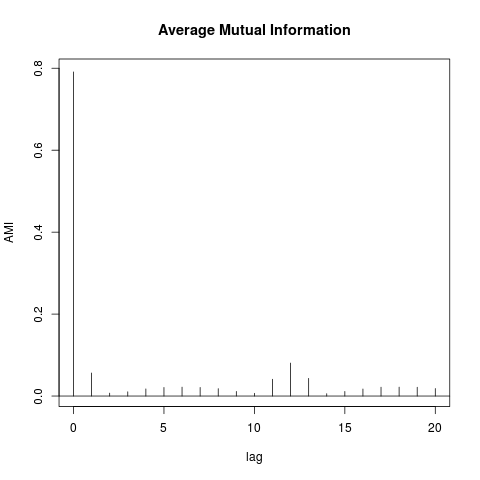

For tos_Omon_GISS-E2-R_past1000_r1i1p128_0850_1850_nino3_tseries.csv the time delay is found as T=9 using the following plot 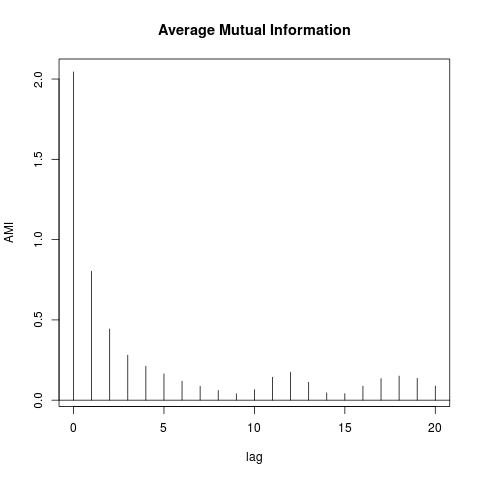

For pr_Amon_IPSL-CM5A-LR_past1000_r1i1p1_0850_1850_goswami_india_tseries.csv the time delay is found as T=3 using the following plot 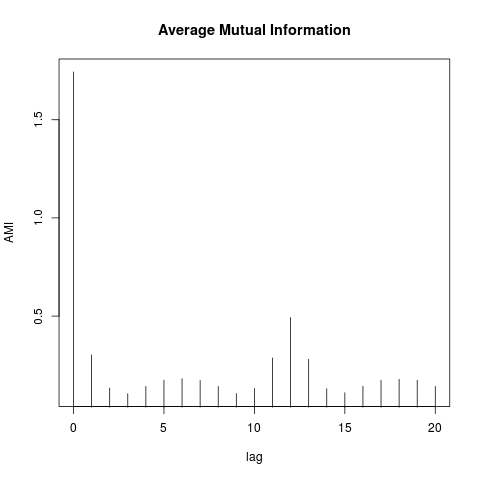

For tas_Amon_IPSL-CM5A-LR_past1000_r1i1p1_0850_1850_nino3_tseries.csv the time delay is found as T=7 using the following plot 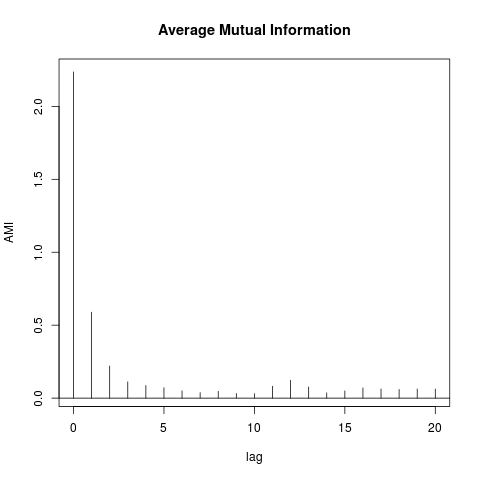

For pr_Amon_MPI-ESM-P_past1000_r1i1p1_085001-184912_goswami_india_tseries.csv the time delay is found as T=4 using the following plot 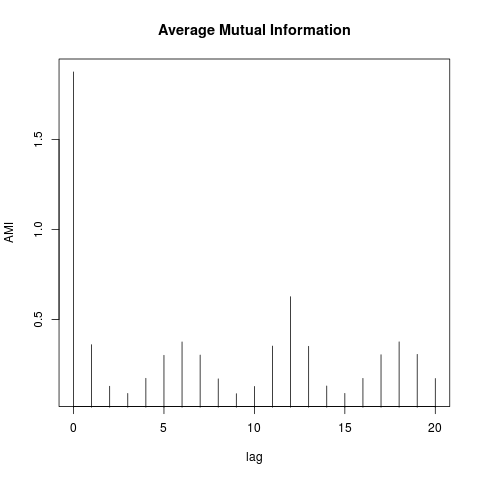

For tos_Amon_MPI-ESM-P_past1000_r1i1p1_0850_1850_nino3_tseries.csv the time delay is found as T=4 using the following plot 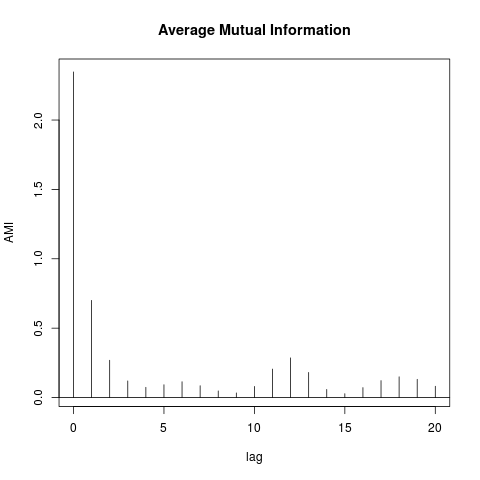

It can be intuitive to understand the algorithm behind finding out the embedding dimension using false nearest neighbours concept https://arxiv.org/pdf/chao-dyn/9810005.pdf

Embedding dimension can then be found using false nearest neighbours and the knowledge from the paper https://pdfs.semanticscholar.org/1dac/279dbef9a0e7f0de3ec4365e952125af6760.pdf  <br> The appropriate choice of the Theiler window and advocates to use two or three times the first minimum of average mutual information as a good
rule of thumb. Another alternative is to match the w time scale to the point at which the average mutual information reaches its asymptotic zero value. <br> So, here I am using the theiler window as the time scale at which the average mutual information asymptotically reaches 0.

Take the value of escape factor (rt) = 10 https://arxiv.org/pdf/1002.1940.pdf

In [3]:
tau_pr_giss = 2
tau_tos_giss = 9
tau_pr_ipsl = 3
tau_tas_ipsl = 7
tau_pr_mpi = 4
tau_tos_mpi = 4

A choice of δ corresponding to 5%–20% of black points in the RP is appropriate. Numerical simulations with
other systems, such as the Lorenz system or the Bernoulli map, confirm these considerations. 

In [30]:
from pyunicorn.timeseries.recurrence_plot import RecurrencePlot
RecurrencePlot(pr_giss , dim=2, tau=1, recurrence_rate=0.05).recurrence_rate()

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...


TypeError: 'float' object is not callable

In [26]:
np.expand_dims(pr_giss, axis=0).shape

(1, 12012)

In [27]:
m_pr_giss

26.0